<a href="https://colab.research.google.com/github/yangtianchangxiao/Dissertation-project-in-Bristol/blob/main/cat_swarm_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Initiate SMP.CDC.SRD and SPC

max(Fitness) 2.2333333333333334
3.8362160841182145


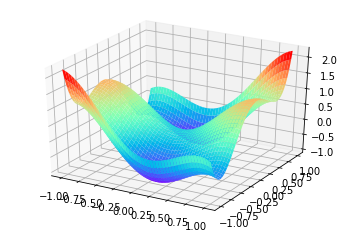

In [ ]:
# Seeking mode set
SMP = 10 # 10 copies of cat 
CDC = 0.5 # Half dimension will change.
SRD = 0.1 # Change rate is 10%
SPC = True 
SPC_ratio = 0.3
seeking_group = 50
coordinate_dimension = 2
best_cat_x = 0
best_cat_y = 0

# Environment Initial
def f(x1,x2): 
   return 3*x1**2-2.1*x1**4+(x1**6)/3+x1*x2-4*x2**2+4*x2**4
#Generate searching area
area = [-1,1,-1,1]
x=np.linspace(area[0],area[1],200)
y=np.linspace(area[2],area[3],200)
X,Y= np.meshgrid(x,y)
Fitness = f(X,Y)
ax3 = plt.axes(projection='3d')
ax3.plot_surface(X,Y,Fitness,cmap='rainbow')
area_size = (area[1]-area[0])*(area[3]-area[2])
#print(type(Fitness))
print("max(Fitness)", np.max(Fitness))

print(f(1,1.133867299686855))
#tracing


tracing_group_size = 10
iteration = 100
accuracy = 0.01

max_tracing_velocity = min(area[1]-area[0],area[3]-area[2])/40
tracing_velocity = np.zeros((coordinate_dimension,tracing_group_size))
tracing_position = np.zeros((coordinate_dimension,tracing_group_size))
c=1.5


In [ ]:
# initate cats
def initiate_cats(group_size):

  
  group=np.zeros((coordinate_dimension,group_size))
  #print(np.shape(group))
  for i in range(group_size):
    x=np.random.uniform(area[0],area[1])
    y=np.random.uniform(area[2],area[3])
    group[0,i]=x
    group[1,i]=y
  #print("shape of group",np.shape(group))
  return group


In [ ]:
# seeking function

def generate_candidate (P):
  array_shape = np.shape(P)
  array_column = array_shape[1]
  array_row = array_shape[0]
  candidate_group = np.zeros((seeking_group,SMP,1,array_row))
  # initial candicates
  for column in range(seeking_group):
    if(np.random.random()>SPC_ratio):
      candidates_num = SMP - 1
      for i in range(candidates_num):
        CDC_array_init = np.random.randn(2)/50
        # if note next two lines below, then the CDC is 0 and both dimensions change in seeking mode
        #a = np.ndarray.tolist(CDC_array_init)
        #CDC_array_init[a.index(np.min(a))]=np.min(a)
        CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,array_row)
        #print(P[:,column]+CDC_array*np.max(a))
        candidate_group[column][i] = P[:,column]+CDC_array*P[:,column]#*np.max(a)
        # constraint on positions
        if candidate_group[column][i][0][0] > area[1]:
          candidate_group[column][i][0][0] = area[1]
        if candidate_group[column][i][0][0] < area[0]:
          candidate_group[column][i][0][0] = area[0]
      candidate_group[column][SMP-1] = P[:,column]
    else:
      candidates_num = SMP
      for i in range(candidates_num):
        CDC_array_init = np.random.randn(2)/50
        a = np.ndarray.tolist(CDC_array_init)
        CDC_array_init[a.index(np.min(a))]=0
        CDC_array = round(np.random.random(),2)*CDC_array_init.reshape(1,array_row)
        #print(P[:,column]+CDC_array*np.max(a))
        candidate_group[column][i] = P[:,column]+CDC_array*P[:,column]
        # constraint on positions
        if candidate_group[column][i][0][0] > area[1]:
          candidate_group[column][i][0][0] = area[1]
        if candidate_group[column][i][0][0] < area[0]:
          candidate_group[column][i][0][0] = area[0]
  #print("candidate_group shape",np.shape(candidate_group))
  return candidate_group


In [ ]:
CDC_array_init=np.random.randn(2)/50
print(CDC_array_init)
CDC_array = round(np.random.random(),2)* np.random.choice((-1, 1))* CDC_array_init.reshape(1,2)
print(CDC_array)

[ 0.01193905 -0.02050098]
[[-0.00990941  0.01701582]]


In [ ]:
max_value = -100
last_max_value = -100
def evaluate(group):
  global max_value, last_max_value
  global best_cat_x, best_cat_y
  index_list=[]
  value_list=[]
  max_value_list=[]

  for cat in range(seeking_group):
    #max_value = -100
    candidate_index = 0
    min_value = 100
    for copy in range(SMP):
      candidate_value=f(group[cat][copy][0][0],group[cat][copy][0][1])
      #print(candidate_value)
      if(candidate_value > max_value):
        max_value = candidate_value
        best_cat_x = group[cat][copy][0][0]
        best_cat_y = group[cat][copy][0][1]
      
      if(candidate_value<min_value):
        min_value = candidate_value
    for copy in range(SMP):
      candidate_value=f(group[cat][copy][0][0],group[cat][copy][0][1])
      value_list.append(candidate_value)
      if copy > 0:
        value_list[copy] = value_list[copy]+value_list[copy-1]
    selected_value = np.random.uniform(value_list[copy],0)
    value_list.append(selected_value)
    value_list.sort()
    candidate_index = value_list.index(selected_value)-1
    #print(candidate_index)
    index_list.append(candidate_index)
    #print("max_value is",max_value)
    value_list = []
  #print("index_list",index_list)
  print("best_cat_x",best_cat_x)
  print("best_cat_y",best_cat_y)
  print("max_value in evaluate", max_value)
  return index_list



In [ ]:
def next_group(original_group,candidate_group,index):
  array_shape = np.shape(original_group)
  array_column = array_shape[1]
  array_row = array_shape[0]
  new_group=np.zeros((array_row,array_column))
  print(np.shape(new_group))
  print(np.shape(candidate_group))
  for i in range(array_column):
    for j in range(array_row):
      new_group[j][i] = candidate_group[i][index[i]][0][j]
  return new_group


In [ ]:
#seeking mode initiation

def tracing_velocity_initiate(group):
  for i in range(group):
    tracing_velocity[0][i] = np.random.uniform(max_tracing_velocity,0)
    tracing_velocity[1][i] = np.random.uniform(max_tracing_velocity,0)
    
def tracing_position_initiate(group):
  global tracing_position
  tracing_position = initiate_cats(group)
  




In [ ]:
def trace_update(velocity,position):
  global tracing_velocity, tracing_position 
  best_cat_array = np.empty((2,tracing_group_size))
  for i in range(tracing_group_size):
    best_cat_array[0][i] = best_cat_x
    best_cat_array[1][i] = best_cat_y
  tracing_velocity = velocity + c*np.random.random()*(best_cat_array-position)
  index1 = np.where(tracing_velocity>max_tracing_velocity)
  index2 = np.where(tracing_velocity<-max_tracing_velocity)
  tracing_velocity[index1] = max_tracing_velocity
  tracing_velocity[index2] = -max_tracing_velocity
  print("tracing_position",position)
  print("best_cat_array",best_cat_array)
  tracing_position = position + tracing_velocity
    # constraint on positions
  index3 = np.where(tracing_position > area[1])
  index4 = np.where(tracing_position < area[0])
  tracing_position[index3] = area[1]
  tracing_position[index4] = area[0]
  #print(tracing_position)
  print("tracing_velocity",tracing_velocity)



In [ ]:
np.random.random()

0.9316796833256661

In [ ]:
def initiate_all():
  cats=initiate_cats(seeking_group)
  #print(cats)
  #print(generate_candidate(cats))

  
  tracing_velocity_initiate(tracing_group_size)
  #print(tracing_velocity)
  tracing_position_initiate(tracing_group_size)
  #print(tracing_position)
  return cats


In [ ]:
def main():
  global tracing_velocity, tracing_position 
  global max_value, last_max_value 
  cats = initiate_all()
  stable_num = 0
  max_value = -100
  last_max_value = -100
  for i in range(iteration):
    candidates = generate_candidate(cats)
    new_group_index = evaluate(candidates)
    #print(new_group_index)
    cats = new_cats= next_group(cats,candidates,new_group_index)
    #print(new_cats)
    trace_update(tracing_velocity,tracing_position)
    total = np.hstack((cats,tracing_position))
    total_index = np.arange(seeking_group + tracing_group_size)
    np.random.shuffle(total_index)
    cats = total[:,total_index[0:seeking_group]]
    #print("cats",cats)
    tracing_position = total[:,seeking_group:seeking_group+tracing_group_size]
    if(max_value-last_max_value<accuracy):
      stable_num = stable_num + 1
    else:
      stable_num = 0
    if stable_num > 20:
      break
    last_max_value = max_value
    print("stable_num",stable_num)
    print("iteration",i)
    print("fitness is")
    print(max_value)

if __name__ == "__main__":
    main()

best_cat_x 0.8705322821731563
best_cat_y 0.904374736695526
max_value in evaluate 1.4040338109970967
(2, 50)
(50, 10, 1, 2)
tracing_position [[ 0.59656813 -0.55447473  0.36381532  0.68333224 -0.11803717  0.7716977
  -0.89637801 -0.99399289  0.42710467  0.77904218]
 [-0.7245138   0.92969058 -0.45233398 -0.28426895  0.08744643  0.04092814
   0.84412185  0.0167719   0.54275453 -0.71671292]]
best_cat_array [[0.87053228 0.87053228 0.87053228 0.87053228 0.87053228 0.87053228
  0.87053228 0.87053228 0.87053228 0.87053228]
 [0.90437474 0.90437474 0.90437474 0.90437474 0.90437474 0.90437474
  0.90437474 0.90437474 0.90437474 0.90437474]]
tracing_velocity [[ 0.05        0.05        0.05        0.05        0.05        0.05
   0.05        0.05        0.05        0.05      ]
 [ 0.05       -0.01270425  0.05        0.05        0.05        0.05
   0.05        0.05        0.05        0.05      ]]
stable_num 0
iteration 0
fitness is
1.4040338109970967
best_cat_x 0.8705322821731563
best_cat_y 0.9046536929